<a href="https://colab.research.google.com/github/jouleffect/ML-Training/blob/main/optdigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esercitazione 24/05/2022

In [1]:
import pandas as pd
import numpy as np

### Import datasets

In [2]:
data_train = pd.read_csv('/content/drive/MyDrive/AI/Esercizi/Python/dataset/optdigits.tra')
data_train.shape

(3822, 65)

In [3]:
data_test = pd.read_csv('/content/drive/MyDrive/AI/Esercizi/Python/dataset/optdigits.tes')
data_test.shape

(1796, 65)

### Normalizzazione dei dati

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()

array_train = scaler.fit_transform(data_train)
print(array_train)

array_test = scaler.fit_transform(data_test)
print(array_test)

[[0.         0.         0.625      ... 0.         0.         0.        ]
 [0.         0.         0.5        ... 0.         0.         0.77777778]
 [0.         0.         0.         ... 0.         0.         0.44444444]
 ...
 [0.         0.         0.1875     ... 0.         0.         0.66666667]
 [0.         0.         0.375      ... 0.3125     0.         0.66666667]
 [0.         0.         0.125      ... 0.         0.         0.77777778]]
[[0.         0.         0.         ... 0.         0.         0.11111111]
 [0.         0.         0.         ... 0.5625     0.         0.22222222]
 [0.         0.         0.4375     ... 0.         0.         0.33333333]
 ...
 [0.         0.         0.0625     ... 0.         0.         0.88888889]
 [0.         0.         0.125      ... 0.         0.         1.        ]
 [0.         0.         0.625      ... 0.0625     0.         0.88888889]]


### Split dei dati estraendo la label

In [6]:
array_train = data_train.to_numpy()
x_train = array_train[:,0:64]
y_train = array_train[:,64]

array_test = data_test.to_numpy()
x_test = array_test[:,0:64]
y_test = array_test[:,64]

print(y_test)

[1 2 3 ... 8 9 8]


### Visualizzazione dei dati

In [7]:
import matplotlib.pyplot as plt

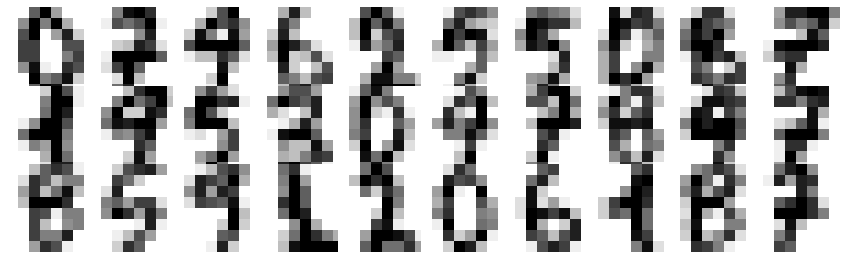

In [8]:
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(x_train[i].reshape((8,8)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

## Model K-neighbors


---


Con 1 neighbor : accuratezza del 98%

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=1)

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

score = model.score(x_test,y_test)
accuracy = accuracy_score(y_test,y_pred)

print(f"score: {score}")
print(f"accuracy: {accuracy}")

score: 0.9799554565701559
accuracy: 0.9799554565701559




---



---



### One Hot Encoder

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [11]:
enc = OneHotEncoder()
y_train = enc.fit_transform(y_train[:, np.newaxis]).toarray()
y_test = enc.fit_transform(y_test[:, np.newaxis]).toarray()

## Model FeedForward



---



In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Dense as dense
from tensorflow.keras.losses import CategoricalCrossentropy as cc
from tensorflow.keras.optimizers import SGD

Definizione del modello (3 Dense layers)

In [13]:
net = tf.keras.Sequential()
net.add(dense(128,activation=tf.nn.relu, input_shape=(64,)))
net.add(dense(64,activation=tf.nn.relu))
net.add(dense(10, activation=tf.nn.softmax))

Definizione del loss e dell'optimizer

In [14]:
loss = cc(from_logits=True)
optimizer = SGD(learning_rate=0.05)

Training del modello

In [15]:
net.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
hist = net.fit(x_train, y_train, batch_size=32, epochs=37)
net.evaluate(x_test,y_test)

Epoch 1/37
120/120 [==============================] - 2s 5ms/step - loss: 1.9819 - accuracy: 0.4809
Epoch 2/37
120/120 [==============================] - 1s 5ms/step - loss: 1.8903 - accuracy: 0.5662
Epoch 3/37
120/120 [==============================] - 1s 4ms/step - loss: 1.8751 - accuracy: 0.5806
Epoch 4/37
120/120 [==============================] - 1s 4ms/step - loss: 1.7525 - accuracy: 0.7106
Epoch 5/37
120/120 [==============================] - 1s 4ms/step - loss: 1.6862 - accuracy: 0.7786
Epoch 6/37
120/120 [==============================] - 1s 4ms/step - loss: 1.6734 - accuracy: 0.7889
Epoch 7/37
120/120 [==============================] - 1s 5ms/step - loss: 1.5882 - accuracy: 0.8786
Epoch 8/37
120/120 [==============================] - 1s 5ms/step - loss: 1.5790 - accuracy: 0.8859
Epoch 9/37
120/120 [==============================] - 1s 5ms/step - loss: 1.5743 - accuracy: 0.8893
Epoch 10/37
120/120 [==============================] - 1s 5ms/step - loss: 1.5707 - accuracy: 0.8932

[1.593342900276184, 0.8646993041038513]

Loss


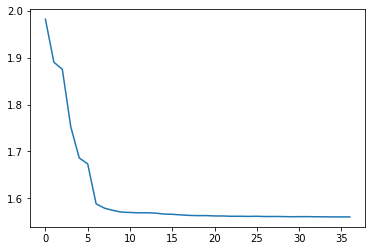

Accuracy


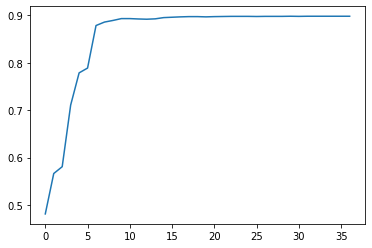

In [16]:
print("Loss")
plt.plot(hist.history['loss'])
plt.show()
print("Accuracy")
plt.plot(hist.history['accuracy'])
plt.show()

Con un learning rate troppo basso non diminuiva il loss, ho aumentato da 0.0001 a 0.05.
Inoltre, arrivando a circa 40 epoche l'accuracy si stabilizza al 90%, ma aumentando le epoche non va oltre il 90% di accuratezza.



---



---



## Model Convolution


---

Modello con:
- layer Conv2D con Kernel 3x3
- layer MaxPooling 2x2
- layer Flatten
- layer Dropout

### Reshape
Ogni riga è un'immagine di 64 pixel, quindi una matrice di 8x8.

In [17]:
x_train_resh = x_train.reshape((-1,8,8,1))
x_train_resh.shape
x_test_resh = x_test.reshape((-1,8,8,1))

### Creazione del modello

In [18]:
from tensorflow import keras
from keras import layers

conv_net = keras.Sequential(
    [
        keras.Input(shape=(8,8,1)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

conv_net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 64)          640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dropout (Dropout)           (None, 576)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5770      
                                                                 
Total params: 6,410
Trainable params: 6,410
Non-trainable params: 0
____________________________________________________

In [19]:
earlyStop = keras.callbacks.EarlyStopping(patience=2)

### Training

In [20]:
batch_size = 64
epochs = 30

conv_net.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

conv_net.fit(x_train_resh, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[earlyStop])

Epoch 1/30
54/54 [==============================] - 3s 8ms/step - loss: 2.1458 - accuracy: 0.3891 - val_loss: 0.4755 - val_accuracy: 0.9269
Epoch 2/30
54/54 [==============================] - 0s 4ms/step - loss: 0.5619 - accuracy: 0.8313 - val_loss: 0.2009 - val_accuracy: 0.9661
Epoch 3/30
54/54 [==============================] - 0s 4ms/step - loss: 0.3254 - accuracy: 0.9069 - val_loss: 0.1427 - val_accuracy: 0.9687
Epoch 4/30
54/54 [==============================] - 0s 4ms/step - loss: 0.2418 - accuracy: 0.9264 - val_loss: 0.1083 - val_accuracy: 0.9765
Epoch 5/30
54/54 [==============================] - 0s 4ms/step - loss: 0.1811 - accuracy: 0.9480 - val_loss: 0.0906 - val_accuracy: 0.9817
Epoch 6/30
54/54 [==============================] - 0s 3ms/step - loss: 0.1608 - accuracy: 0.9494 - val_loss: 0.0732 - val_accuracy: 0.9843
Epoch 7/30
54/54 [==============================] - 0s 3ms/step - loss: 0.1531 - accuracy: 0.9552 - val_loss: 0.0715 - val_accuracy: 0.9843
Epoch 8/30
54/54 [==

Ho settato 30 epoche, ma l'early stop ha raggiunto circa 20 epoche con 99% di accuratezza.

### Predizione dei risultati

In [21]:
y_pred = np.zeros( (y_test.shape[0],10) ) 
y_pred = conv_net.predict(x_test_resh)
y_pred = np.argmax(y_pred,axis = 1)

### Visualizzazione dei dati predetti

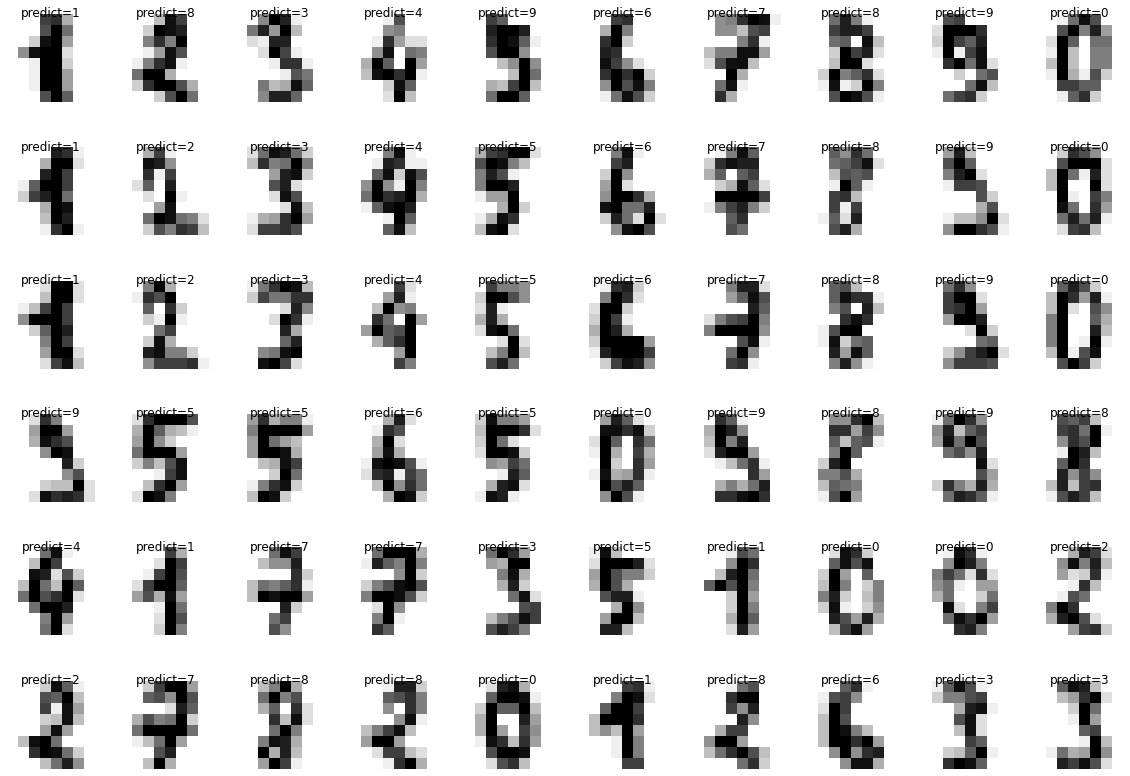

In [22]:
plt.figure(figsize=(20,15))
for i in range(60):
    plt.subplot(6, 10, i+1)    
    plt.imshow(x_test[i].reshape((8,8)),cmap=plt.cm.binary)
    plt.title("predict=%d" % y_pred[i],y=0.9)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()